In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
heart=pd.read_csv('/content/heart.csv')
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
print('Number of rows are',heart.shape[0], 'and number of columns are ',heart.shape[1])

Number of rows are 303 and number of columns are  14


In [ ]:
heart.isnull().sum()/len(heart)*100

age         0.0
sex         0.0
cp          0.0
trtbps      0.0
chol        0.0
fbs         0.0
restecg     0.0
thalachh    0.0
exng        0.0
oldpeak     0.0
slp         0.0
caa         0.0
thall       0.0
output      0.0
dtype: float64

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
heart[heart.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [ ]:
heart.drop_duplicates(keep='first',inplace=True)

In [ ]:
print('Number of rows are',heart.shape[0], 'and number of columns are ',heart.shape[1])

Number of rows are 302 and number of columns are  14


In [ ]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
heart.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


Number of people having sex as 1 are 96 and Number of people having sex as 0 are 206


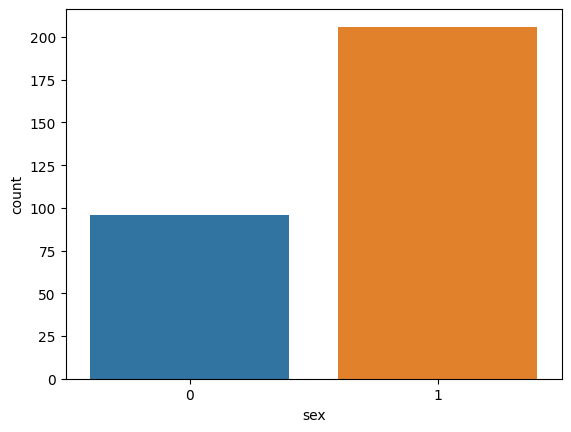

In [ ]:
x=(heart.sex.value_counts())
print(f'Number of people having sex as 1 are {x[0]} and Number of people having sex as 0 are {x[1]}')
p = sns.countplot(data=heart, x="sex")
plt.show()

0    143
2     86
1     50
3     23
Name: cp, dtype: int64


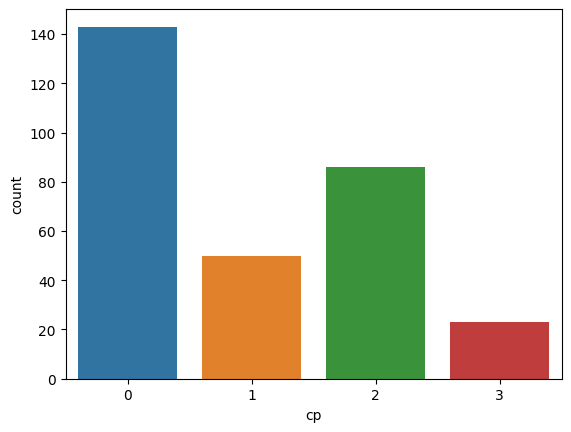

In [ ]:
x=(heart.cp.value_counts())
print(x)
p = sns.countplot(data=heart, x="cp")
plt.show()

0    143
2     86
1     50
3     23
Name: cp, dtype: int64


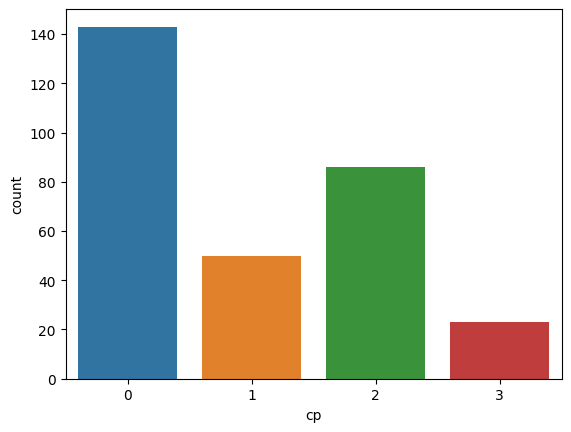

In [ ]:
x=(heart.cp.value_counts())
print(x)
p = sns.countplot(data=heart, x="cp")
plt.show()

0    257
1     45
Name: fbs, dtype: int64


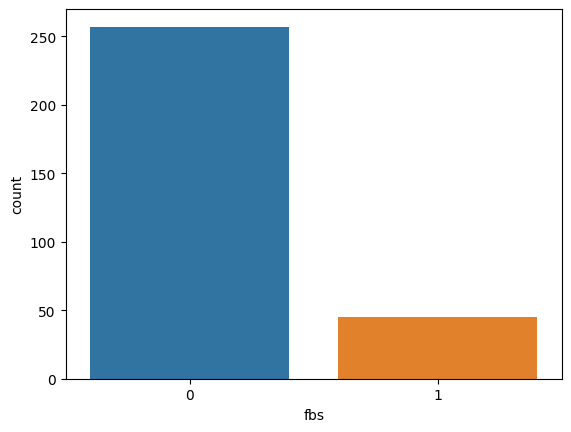

In [ ]:
x=(heart.fbs.value_counts())
print(x)
p = sns.countplot(data=heart, x="fbs")
plt.show()

1    151
0    147
2      4
Name: restecg, dtype: int64


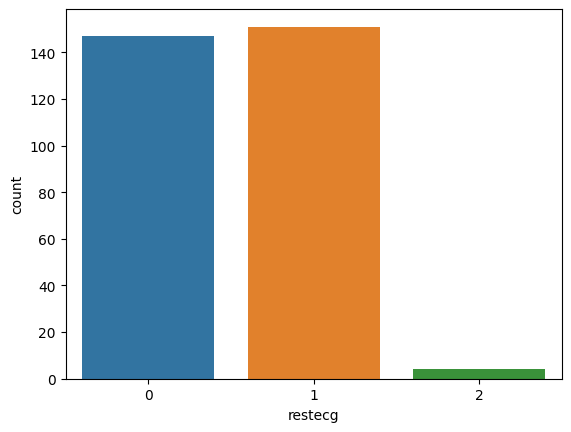

In [ ]:
x=(heart.restecg.value_counts())
print(x)
p = sns.countplot(data=heart, x="restecg")
plt.show()

0    203
1     99
Name: exng, dtype: int64


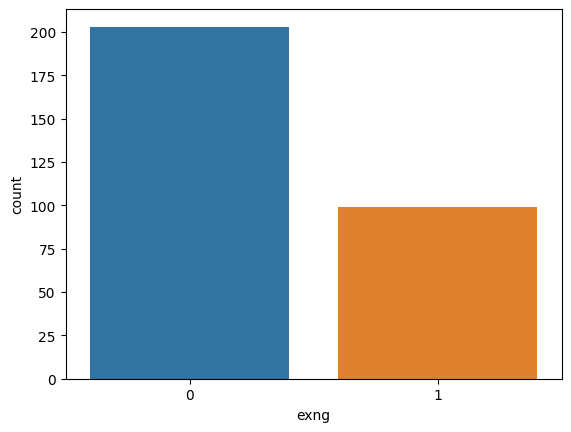

In [ ]:
x=(heart.exng.value_counts())
print(x)
p = sns.countplot(data=heart, x="exng")
plt.show()

2    165
3    117
1     18
0      2
Name: thall, dtype: int64


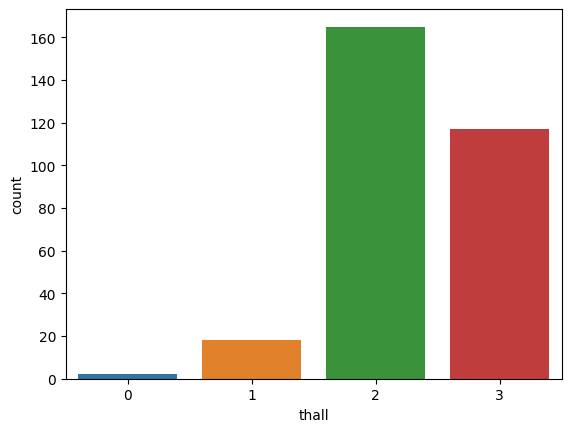

In [ ]:
x=(heart.thall.value_counts())
print(x)
p = sns.countplot(data=heart, x="thall")
plt.show()

<Figure size 1000x1000 with 0 Axes>

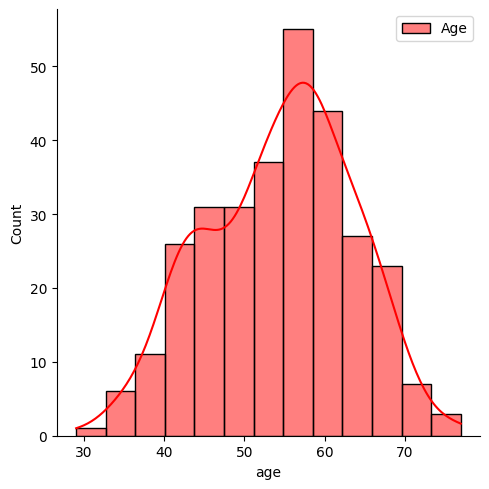

In [ ]:
plt.figure(figsize=(10,10))
sns.displot(heart.age, color="red", label="Age", kde= True)
plt.legend()

<Figure size 2000x2000 with 0 Axes>

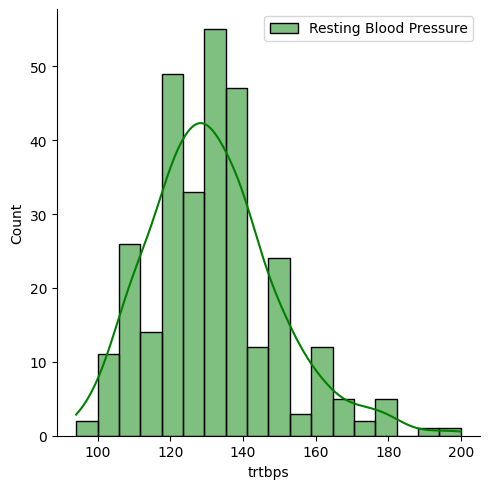

In [ ]:
plt.figure(figsize=(20,20))
sns.displot(heart.trtbps , color="green", label="Resting Blood Pressure", kde= True)
plt.legend()

<ipython-input-20-c56dbf176e53>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart[heart['output'] == 0]["age"], color='green',kde=True,)
<ipython-input-20-c56dbf176e53>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart[heart['output'] == 1]["age"], color='red',kde=True)


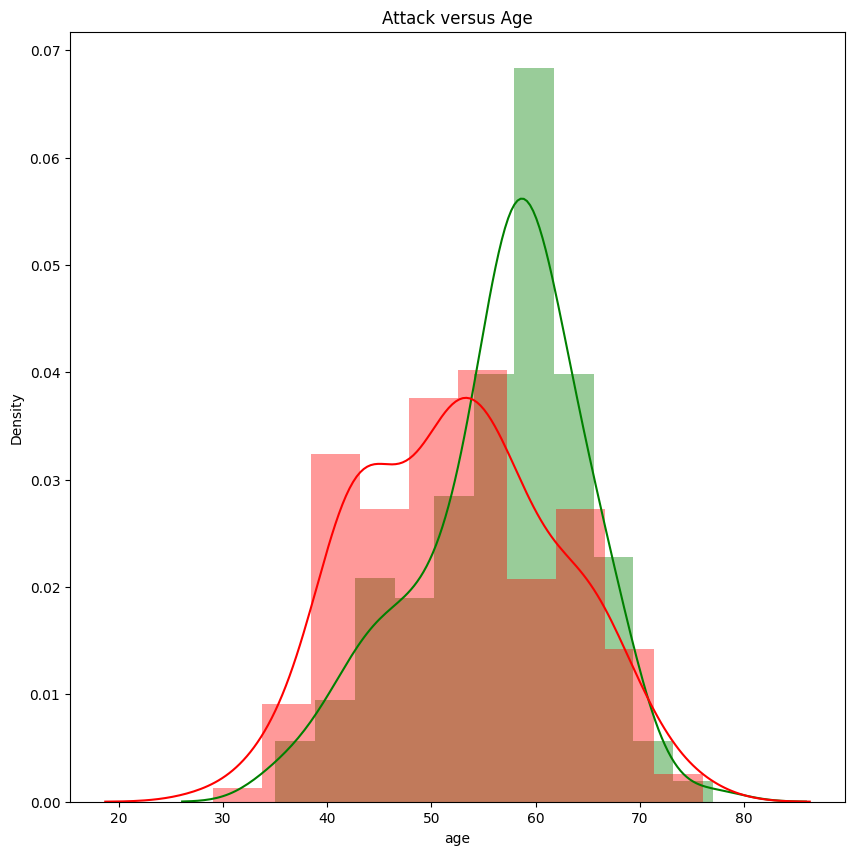

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(heart[heart['output'] == 0]["age"], color='green',kde=True,)
sns.distplot(heart[heart['output'] == 1]["age"], color='red',kde=True)
plt.title('Attack versus Age')
plt.show()

<ipython-input-21-7946f131d8a2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart[heart['output'] == 0]["chol"], color='green',kde=True,)
<ipython-input-21-7946f131d8a2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart[heart['output'] == 1]["chol"], color='red',kde=True)


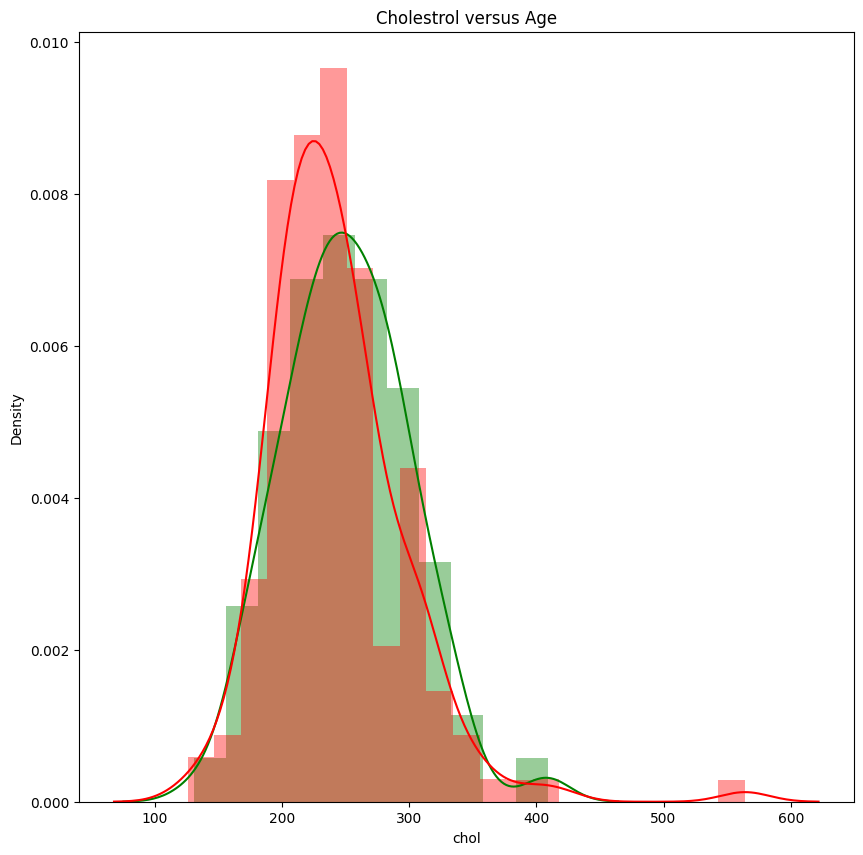

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(heart[heart['output'] == 0]["chol"], color='green',kde=True,)
sns.distplot(heart[heart['output'] == 1]["chol"], color='red',kde=True)
plt.title('Cholestrol versus Age')
plt.show()

<ipython-input-22-178cb528152e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart[heart['output'] == 0]["trtbps"], color='green',kde=True,)
<ipython-input-22-178cb528152e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart[heart['output'] == 1]["trtbps"], color='red',kde=True)


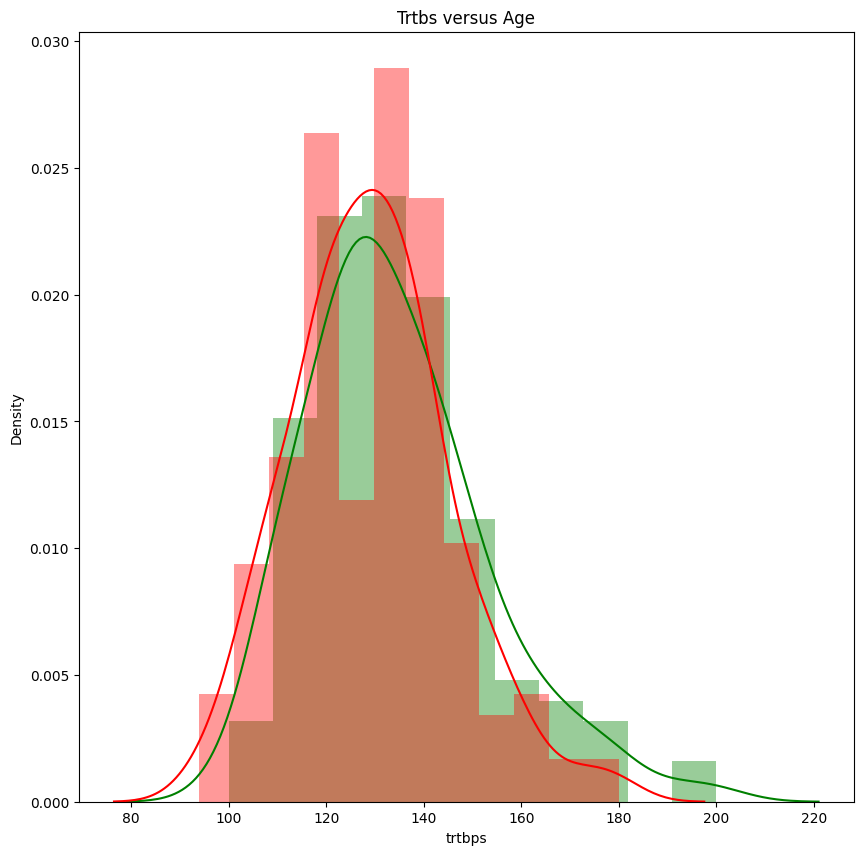

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(heart[heart['output'] == 0]["trtbps"], color='green',kde=True,)
sns.distplot(heart[heart['output'] == 1]["trtbps"], color='red',kde=True)
plt.title('Trtbs versus Age')
plt.show()

<ipython-input-23-4d638aa44a7b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart[heart['output'] == 0]["thalachh"], color='green',kde=True,)
<ipython-input-23-4d638aa44a7b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart[heart['output'] == 1]["thalachh"], color='red',kde=True)


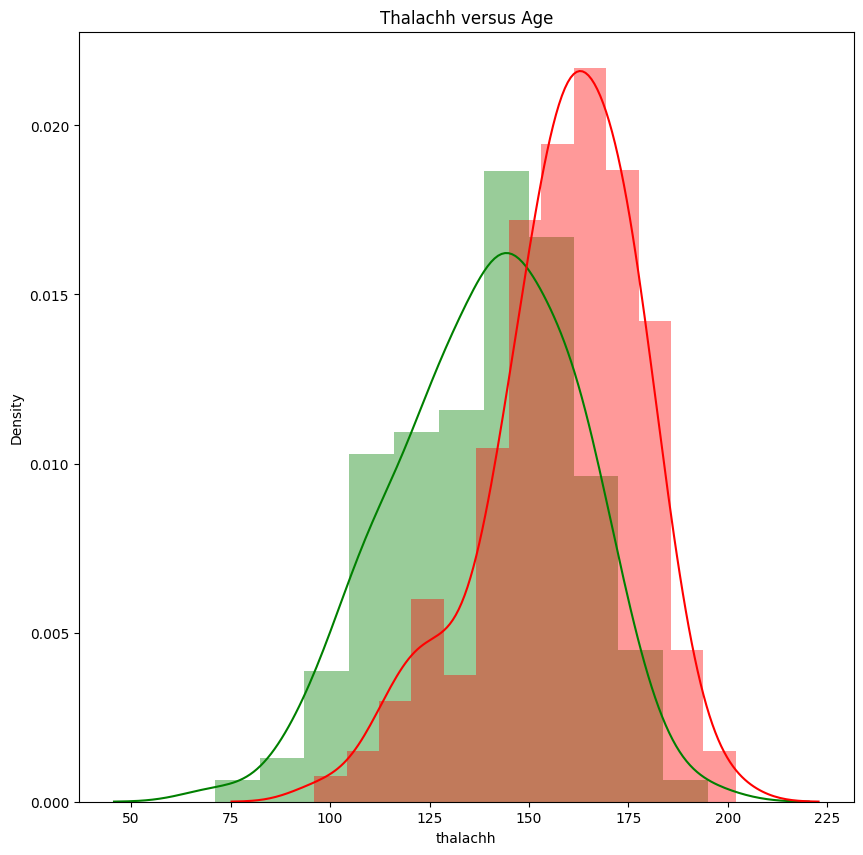

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(heart[heart['output'] == 0]["thalachh"], color='green',kde=True,)
sns.distplot(heart[heart['output'] == 1]["thalachh"], color='red',kde=True)
plt.title('Thalachh versus Age')
plt.show()

<Figure size 2000x2000 with 0 Axes>

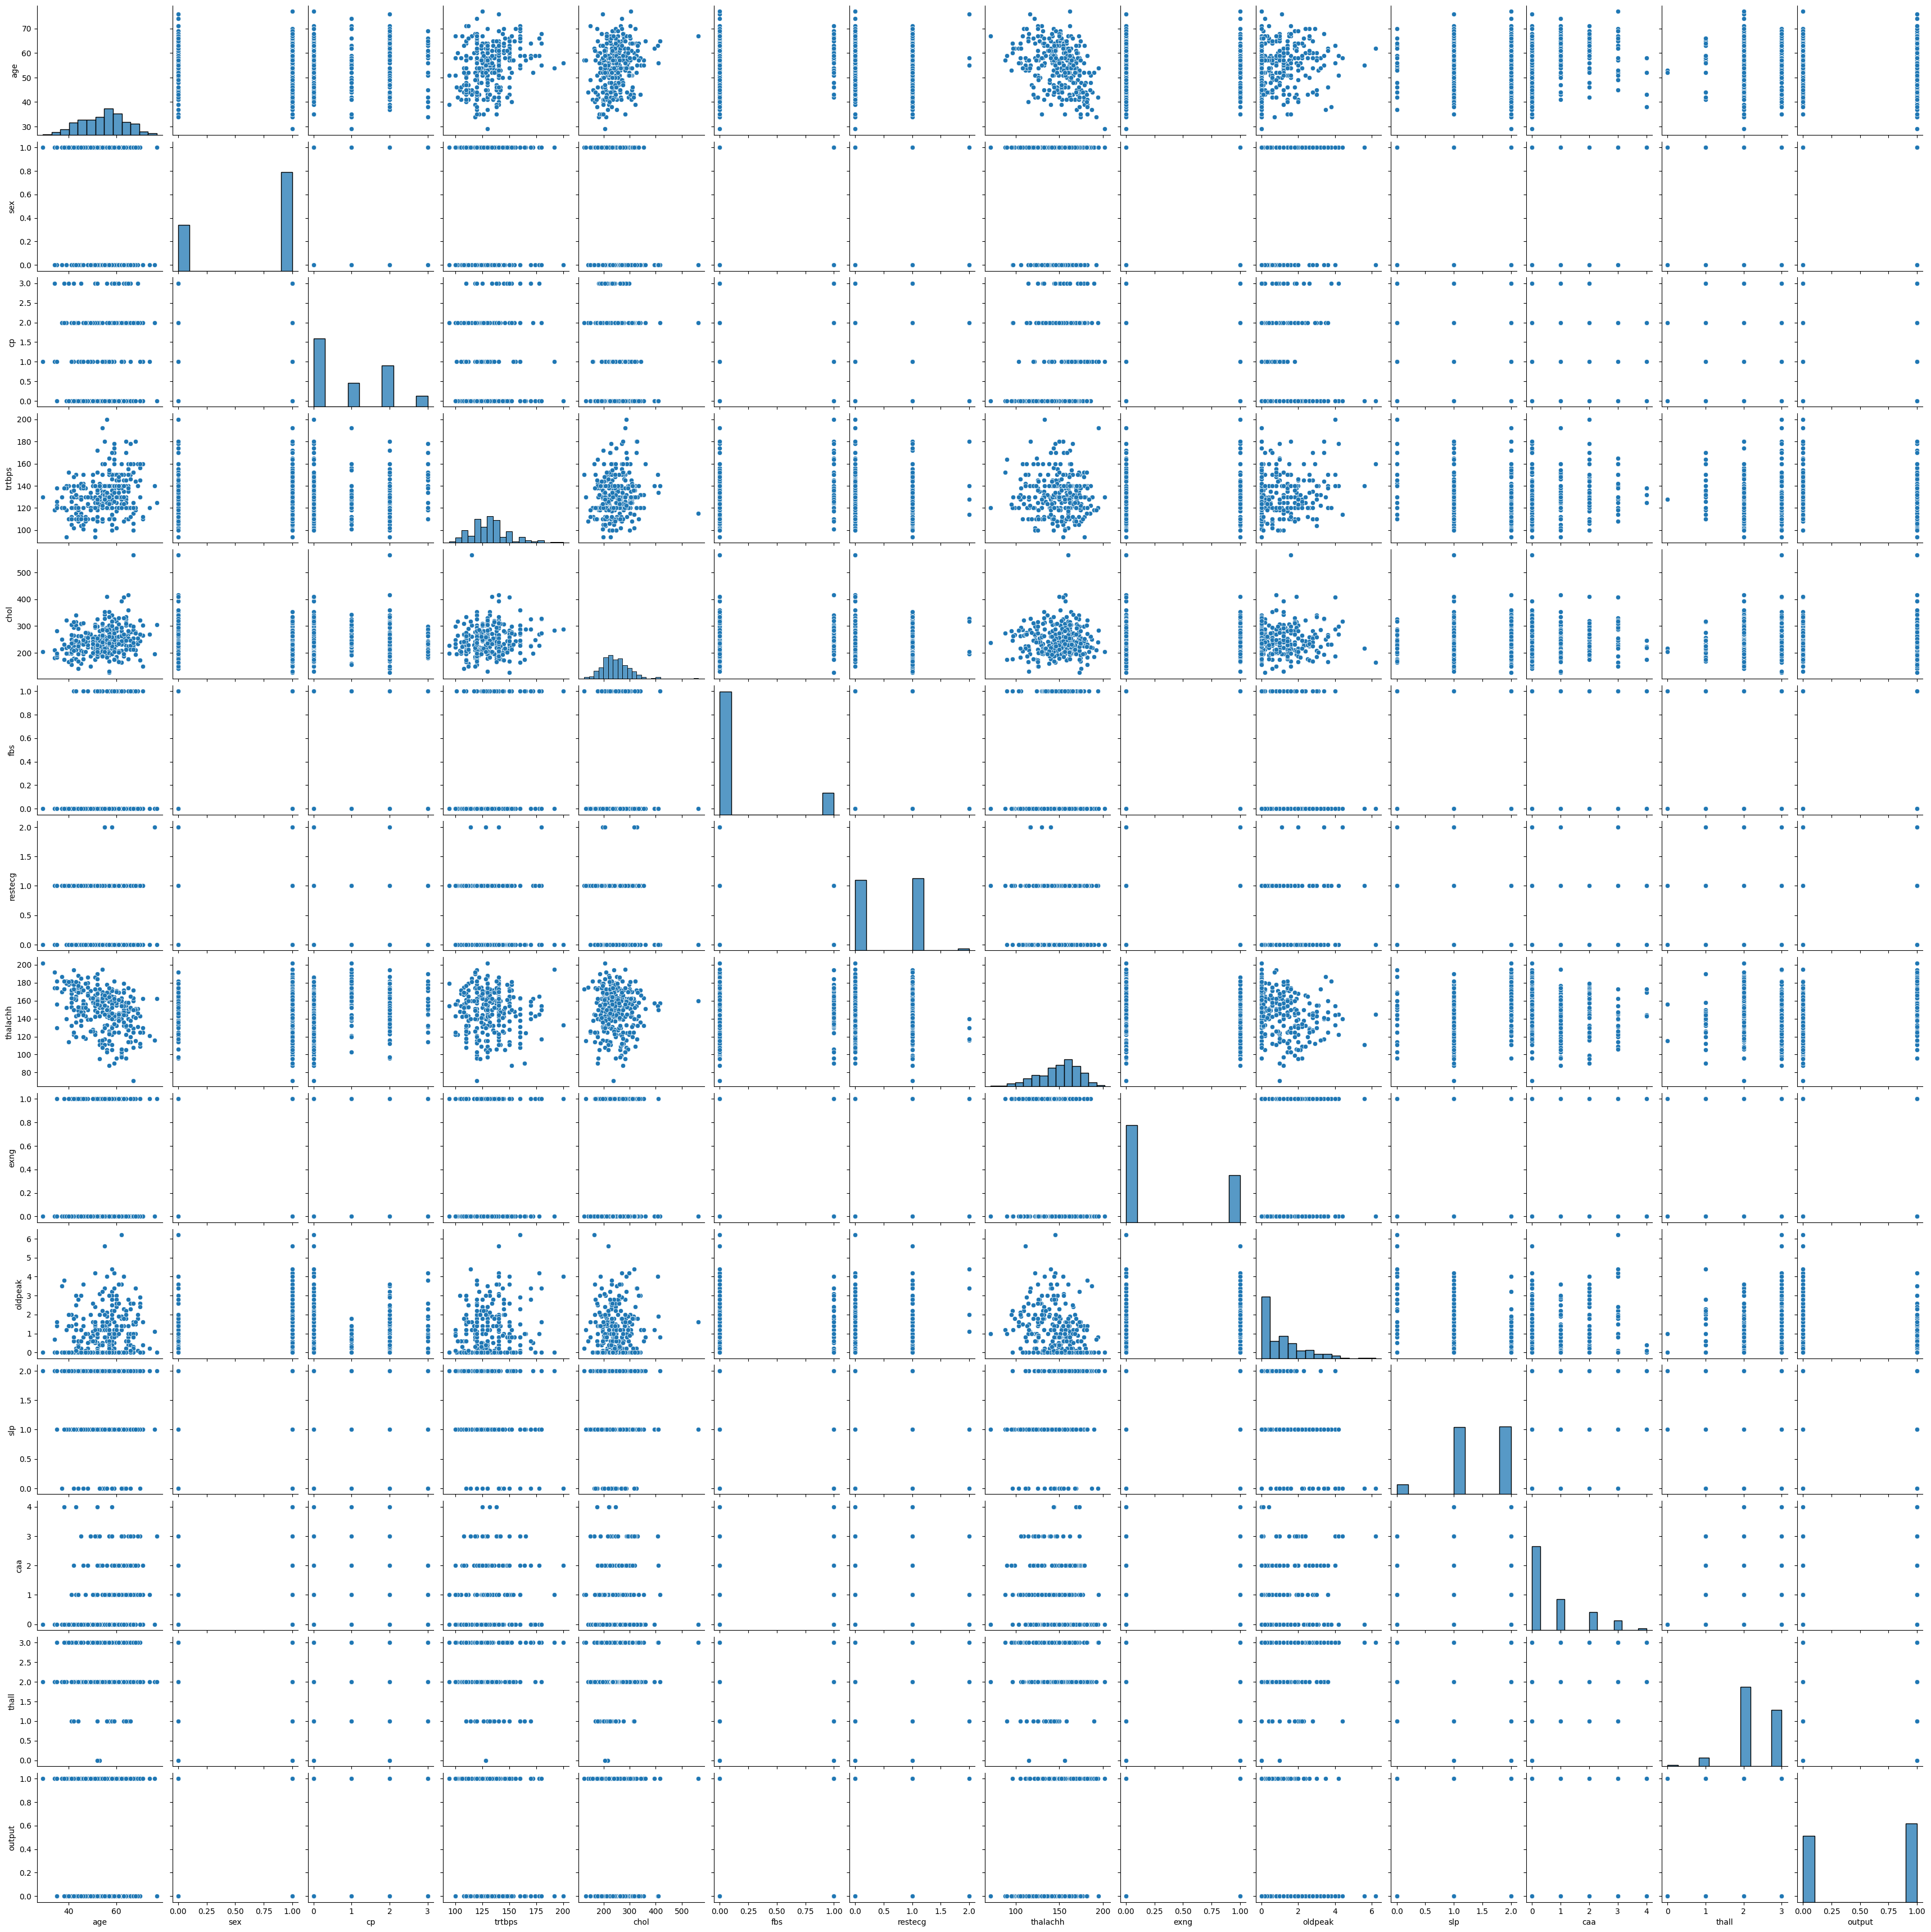

In [ ]:
plt.figure(figsize=(20,20))
sns.pairplot(heart)
plt.show()

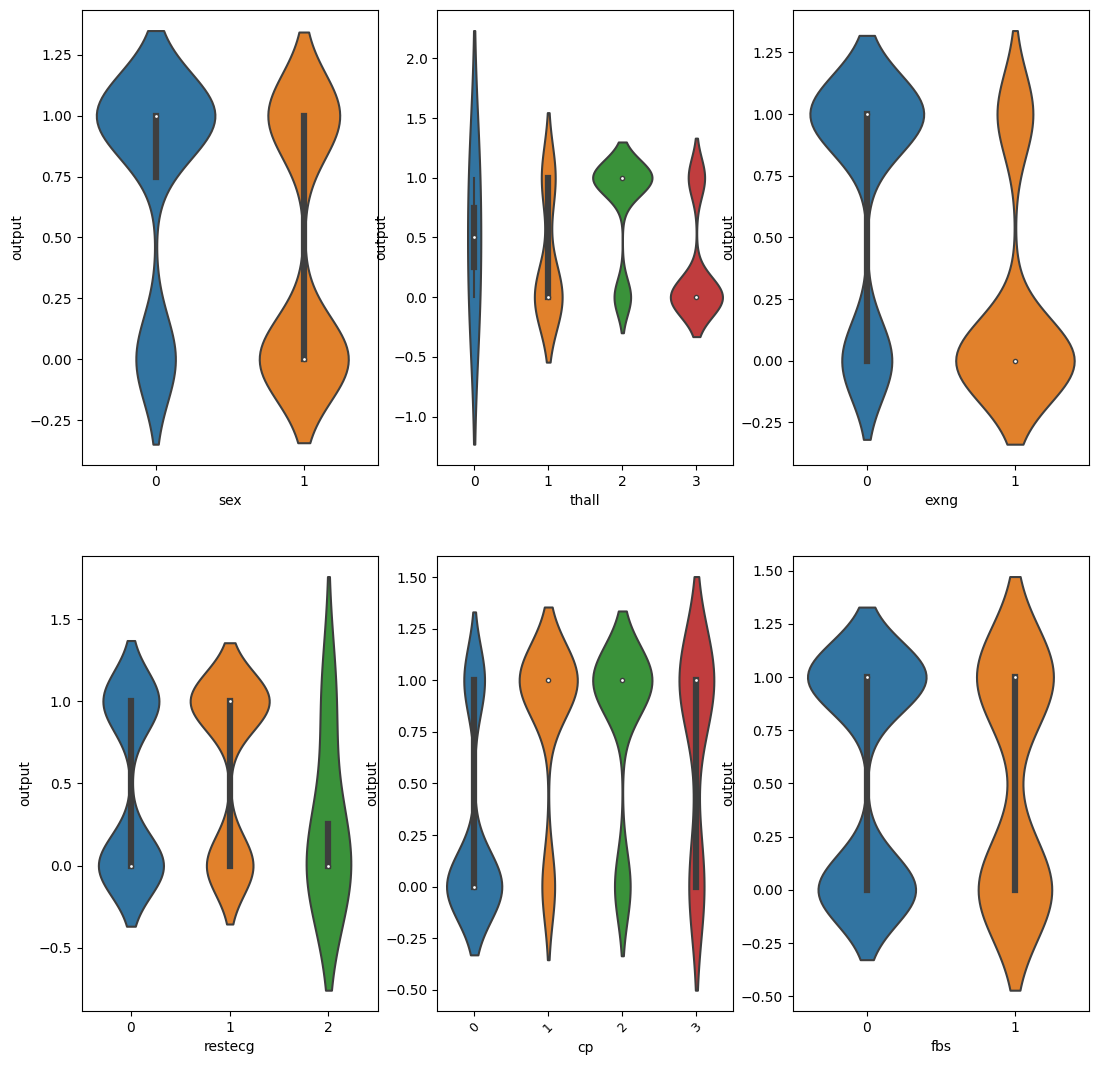

In [ ]:
plt.figure(figsize=(13,13))
plt.subplot(2,3,1)
sns.violinplot(x = 'sex', y = 'output', data = heart)
plt.subplot(2,3,2)
sns.violinplot(x = 'thall', y = 'output', data = heart)
plt.subplot(2,3,3)
sns.violinplot(x = 'exng', y = 'output', data = heart)
plt.subplot(2,3,4)
sns.violinplot(x = 'restecg', y = 'output', data = heart)
plt.subplot(2,3,5)
sns.violinplot(x = 'cp', y = 'output', data = heart)
plt.xticks(fontsize=9, rotation=45)
plt.subplot(2,3,6)
sns.violinplot(x = 'fbs', y = 'output', data = heart)

plt.show()

In [ ]:
x = heart.iloc[:, 1:-1].values
y = heart.iloc[:, -1].values
x,y

(array([[  1.,   3., 145., ...,   0.,   0.,   1.],
        [  1.,   2., 130., ...,   0.,   0.,   2.],
        [  0.,   1., 130., ...,   2.,   0.,   2.],
        ...,
        [  1.,   0., 144., ...,   1.,   2.,   3.],
        [  1.,   0., 130., ...,   1.,   1.,   3.],
        [  0.,   1., 130., ...,   1.,   1.,   2.]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0,

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

In [ ]:
print('Shape for training data', x_train.shape, y_train.shape)
print('Shape for testing data', x_test.shape, y_test.shape)

Shape for training data (241, 12) (241,)
Shape for testing data (61, 12) (61,)


In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train,x_test

NameError: ignored

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
predicted=model.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print()
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")

Confusion Matrix : 
 [[23  4]
 [ 3 31]]


The accuracy of Logistic Regression is :  88.52459016393442 %


In [ ]:
model = GaussianNB()
model.fit(x_train, y_train)

predicted = model.predict(x_test)

print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")

The accuracy of Gaussian Naive Bayes model is :  88.52459016393442 %


In [ ]:
model = BernoulliNB()
model.fit(x_train, y_train)

predicted = model.predict(x_test)

print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")

The accuracy of Gaussian Naive Bayes model is :  86.88524590163934 %


In [ ]:
model = SVC()
model.fit(x_train, y_train)

predicted = model.predict(x_test)
print("The accuracy of SVM is : ", accuracy_score(y_test, predicted)*100, "%")

The accuracy of SVM is :  91.80327868852459 %


In [ ]:
model = RandomForestRegressor(n_estimators = 100, random_state = 0)
model.fit(x_train, y_train)
predicted = model.predict(x_test)
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")


The accuracy of Random Forest is :  85.24590163934425 %


In [ ]:
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(x_train, y_train)
predicted = model.predict(x_test)
print(confusion_matrix(y_test, predicted))
print("The accuracy of KNN is : ", accuracy_score(y_test, predicted.round())*100, "%")



[[23  4]
 [ 6 28]]
The accuracy of KNN is :  83.60655737704919 %


Text(0, 0.5, 'Error Rate')

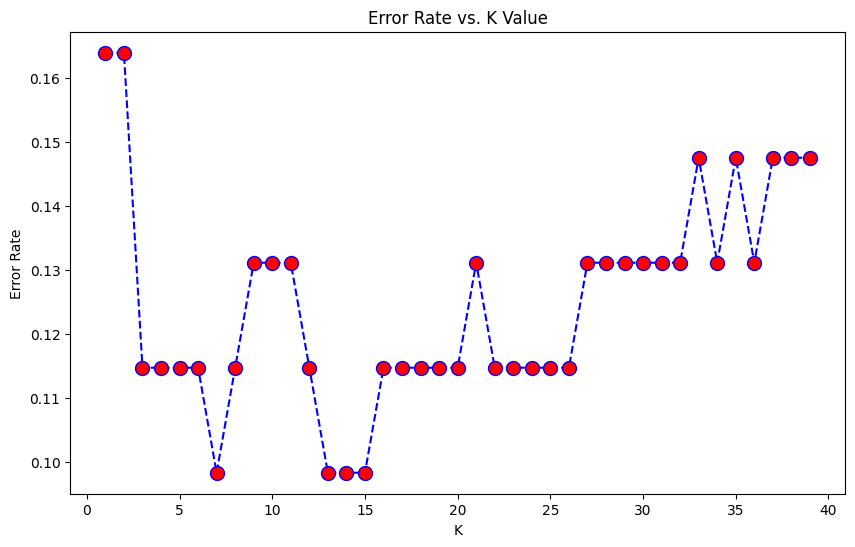

In [ ]:
error_rate = []

for i in range(1, 40):

    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train, y_train)
    pred_i = model.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [ ]:
model = KNeighborsClassifier(n_neighbors = 7)

model.fit(x_train, y_train)
predicted = model.predict(x_test)

print('Confusion Matrix :')
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicted))

print()
print()
print("The accuracy of KNN is : ", accuracy_score(y_test, predicted.round())*100, "%")


Confusion Matrix :
[[25  2]
 [ 4 30]]


The accuracy of KNN is :  90.1639344262295 %


In [ ]:
model = xgb.XGBClassifier(use_label_encoder=False)
model.fit(x_train, y_train)

predicted = model.predict(x_test)

cm = confusion_matrix(y_test, predicted)
print()
print ("The accuracy of X Gradient Boosting is : ", accuracy_score(y_test, predicted)*100, "%")


The accuracy of X Gradient Boosting is :  81.9672131147541 %
